[**Demo %s**](#demo-precond-diagonal)

Here is an SPD matrix that arises from solving partial differential equations.

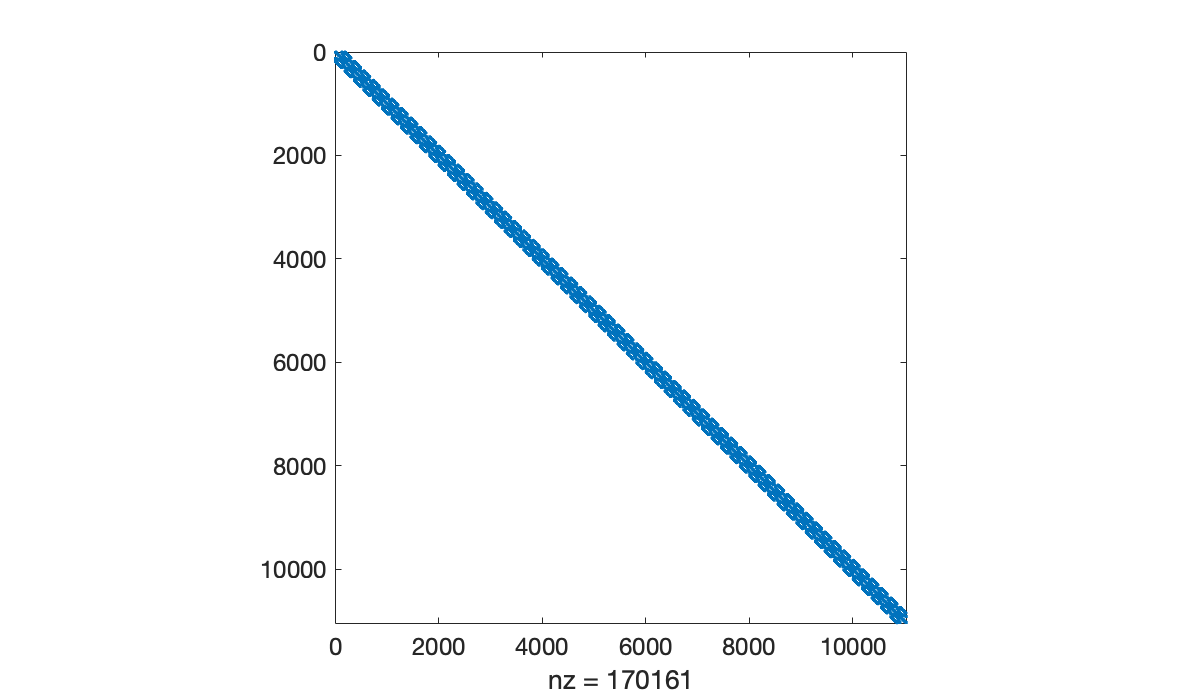

In [2]:
A = gallery("wathen", 60, 60);
n = size(A, 1);
clf,  spy(A)

There is an easy way to use the diagonal elements of $\mathbf{A}$, or any other vector, as a diagonal preconditioner.

In [3]:
M = spdiags(diag(A), 0, n, n);

We now compare MINRES with and without the preconditioner.

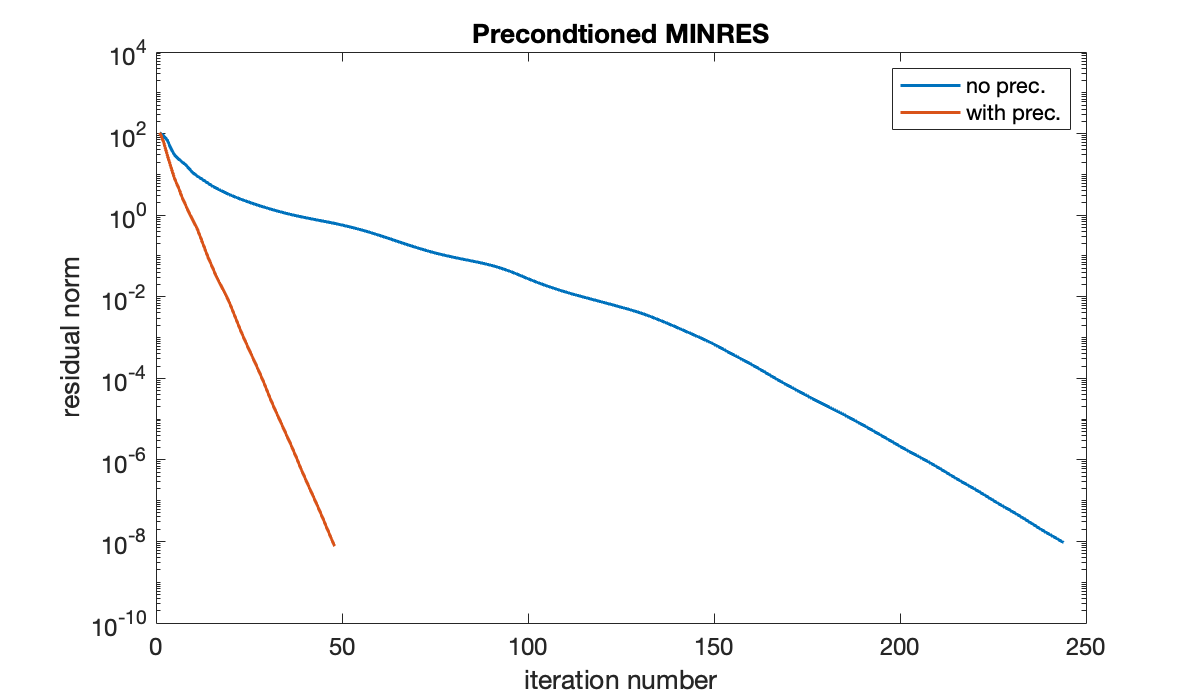

In [4]:
b = ones(n, 1);
[x, ~, ~, ~, resid_plain] = minres(A, b, 1e-10, 400);
clf,  semilogy(resid_plain)
xlabel('iteration number'), ylabel('residual norm')
title('Unpreconditioned MINRES')

[x, ~, ~, ~, resid_prec] = minres(A, b, 1e-10, 400, M);
hold on,  semilogy(resid_prec)
title('Precondtioned MINRES')
legend('no prec.', 'with prec.');

The diagonal preconditioner cut down substantially on the number of iterations. The effect on the total time is less dramatic, but this is not a large version of the problem.